In [1]:
!pip install seaborn scikit-learn matplotlib pandas



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
# Upload the dataset from your local system if you're using Colab
from google.colab import files
uploaded = files.upload()

Saving air_quality_classification_data.csv to air_quality_classification_data.csv


In [4]:
# Load the uploaded CSV file into a DataFrame
# Replace 'air_quality_classification_data.csv' with the actual filename you upload
df = pd.read_csv('air_quality_classification_data.csv')


In [5]:
# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())


Sample Data:
       PM2.5        NO2  Temperature AirQualityLevel
0  57.450712  33.577874    17.027862       Unhealthy
1  47.926035  35.607845    22.003125        Moderate
2  59.715328  40.830512    25.026218       Unhealthy
3  72.845448  40.538021    25.234903       Unhealthy
4  46.487699  16.223306    22.749673        Moderate


In [6]:
# Encode the target variable (Air Quality Level) as numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AirQualityEncoded'] = le.fit_transform(df['AirQualityLevel'])


In [7]:
# Separate features and target
X = df[['PM2.5', 'NO2', 'Temperature']]
y = df['AirQualityEncoded']

In [8]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions
y_pred = clf.predict(X_test)


In [11]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")



Accuracy: 0.97


In [12]:
# Generate a classification report
print("\nClassification Report:")
target_names = le.inverse_transform([0, 1, 2])  # Adjust if class order is different
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.67      0.80         3
    Moderate       0.95      1.00      0.97        18
   Unhealthy       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.98      0.89      0.92        40
weighted avg       0.98      0.97      0.97        40



In [13]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

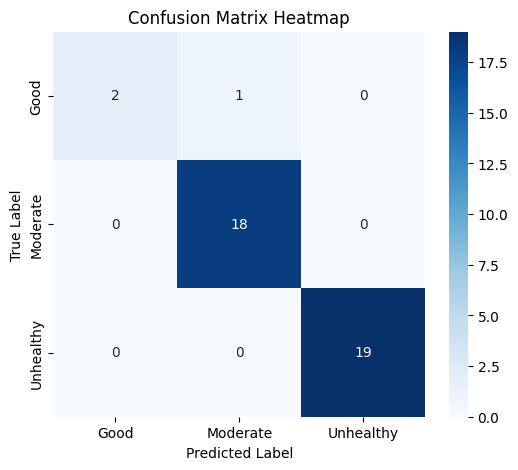

In [15]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()